In [41]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(["science","bright","grid"])

In [42]:
EPSILON_0 = 8.85418781762039e-3

In [43]:
def cap_m_old(eps_r, r1, r2, s=1.0):
    # Base factor
    d       = r1 + r2 + s
    factor  = 4 * np.pi * EPSILON_0 * eps_r * (r1 * r2) / d
    
    # Terms of the Taylor expansion
    term1       = 1.0
    term2       = (r1 * r2) / (d**2 - 2*r1*r2)
    denominator = d**4 - 4*(d**2)*r1*r2 + 3*(r1**2)*(r2**2)
    term3       = ((r1**2)*(r2**2)) / denominator
    cap         = factor * (term1 + term2 + term3)
                    
    return cap

def cap_m_sinh(eps_r, r1, r2, s=1.0, N=20):
    
    d       = r1 + r2 + s
    U       = np.arccosh((d**2 - r1**2 - r2**2)/(2*r1*r2))
    factor  = 4 * np.pi * EPSILON_0 * eps_r * (r1 * r2) / d
    sums    = []

    for n in range(1,N+1):
        sums.append(1/np.sinh(n*U))

    cap = factor*np.sinh(U)*np.sum(sums)

    return cap

In [44]:
r1      = 10.0
r2      = 10.0
eps_r   = 2.6
C12_o   = cap_m_old(eps_r, r1, r2)

In [45]:
N_vals      = np.arange(1,20)
c12_n_vals  = []
for N in N_vals:
    c12_n_vals.append(cap_m_sinh(eps_r,r1,r2,N=N))

Text(0.5, 0, '$N$')

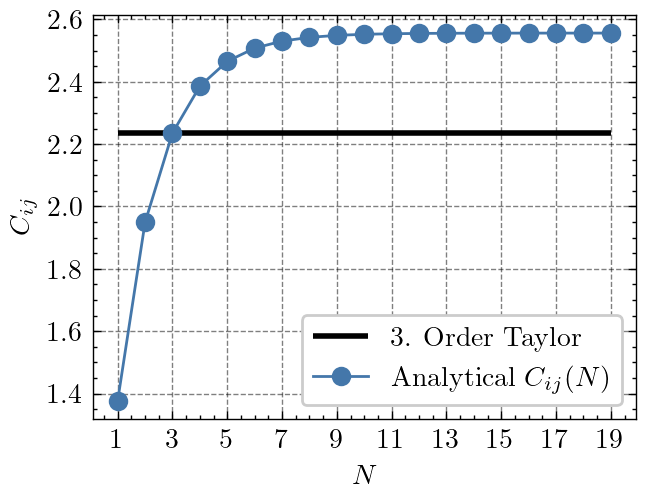

In [46]:
fig, ax = plt.subplots(dpi=200)
ax.hlines(C12_o, xmin=np.min(N_vals), xmax=np.max(N_vals), lw=2, colors='black', label='3. Order Taylor')
ax.plot(N_vals, c12_n_vals, '-o', label='Analytical $C_{ij}(N)$')
ax.legend()
_ = ax.set_xticks(N_vals[0::2])
ax.set_ylabel("$C_{ij}$")
ax.set_xlabel("$N$")